### 安装OpenCV

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 读取图像

In [5]:
import cv2
img=cv2.imread('img/opencv/lena.jpg')  	#读取图像
print(type(img))            	#输出数据类型
# print(img)                  	#输出图像数组
print(img.shape)		        #输出数组形状
print(img.dtype)			    #输出数组元素的数据类型
print(img.size)			        #输出数组元素的个数

<class 'numpy.ndarray'>
(512, 512, 3)
uint8
786432


### 显示图像

In [6]:
import matplotlib.pyplot as plt
import cv2
cv2.imshow("lena", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

### 创建240×320黑色图像

In [7]:
import cv2
import numpy
img = numpy.zeros((240,320), dtype=numpy.uint8)  #创建240×320黑色图像
cv2.imshow('GrayImg', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

### 操作灰度图像

In [8]:
import cv2
import numpy
img = numpy.zeros((240,320), dtype=numpy.uint8)  #创建240×320黑色图像
n=0
while True:
    cv2.imshow('GrayImg', img)
    n+=20
    img[:, :]=n                 # 更改图像灰度值
    print(img[1,1])             # 输出一个像素值
    key=cv2.waitKey(1000)       # 延迟1秒
    if key==27:                 # ASCII 
        cv2.destroyAllWindows() 
        break                   # 按【Esc】键结束

20


> HTML ASCII 参考手册   
> https://www.runoob.com/tags/html-ascii.html

### 操作彩色图像

In [9]:
import cv2
import numpy

img=numpy.zeros((240,320,3), dtype=numpy.uint8)	#创建图像

img[:80,:,0]=255    #通道r0，将上部1/3颜色值设为255
img[80:160,:,1]=255 #通道r1，将中部1/3颜色值设为255
img[160:,:,2]=255   #通道r2，将下部1/3颜色值设为255
cv2.imshow('ColorImg',img)

cv2.waitKey(0)                       #延迟1秒
cv2.destroyAllWindows() 

彩色图像变更

In [10]:
import cv2
import numpy
img=numpy.zeros((240,320,3), dtype=numpy.uint8)	#创建图像
r0=0
r1=1
r2=2
while True:
    img[:80,:,r0]=255                           #通道r0，将上部1/3颜色值设为255
    img[80:160,:,r1]=255                        #通道r1，将中部1/3颜色值设为255
    img[160:,:,r2]=255                          #通道r2，将下部1/3颜色值设为255
    cv2.imshow('ColorImg',img)
    key=cv2.waitKey(1000)                       #延迟1秒
    img[:,:,:]=0                                #像素全部置0
    t=r0                                        #轮换通道序号
    r0=r1
    r1=r2
    r2=t
    if key==27:
        cv2.destroyAllWindows() 
        break

##### 通过数组索引拆分通道

OpenCV中BGR格式的图像是一个三维数组，可用数组的索引操作拆分3个色彩通道，示例代码如下。

In [11]:
import cv2
img=cv2.imread('img/opencv/lena.jpg',cv2.IMREAD_REDUCED_COLOR_2)	#读图像，将其尺寸减小为原来的1/2
print(img.shape)
cv2.imshow('lena',img)          	                    #显示原图像

b=img[:, :, 0]                    	                    #获得B通道图像
g=img[:, :, 1]                    	                    #获得G通道图像
r=img[:, :, 2]                   	 	                #获得R通道图像

cv2.imshow('lena_B',b)          	                    #显示B通道图像
cv2.imshow('lena_G',g)          	                    #显示G通道图像
cv2.imshow('lena_R',r)          	                    #显示R通道图像
cv2.waitKey(0)
cv2.destroyAllWindows() 

(256, 256, 3)


##### 使用cv2.split()函数拆分通道

In [12]:
import cv2
img=cv2.imread('img/opencv/lena.jpg',cv2.IMREAD_REDUCED_COLOR_2)		#读图像，将其尺寸减小为原来的1/2

cv2.imshow('lena',img)          	                        #显示原图像

b,g,r=cv2.split(img)            	                        #按通道拆分图像

cv2.imshow('lena_B',b)          	                        #显示B通道图像
cv2.imshow('lena_G',g)          	                        #显示G通道图像
cv2.imshow('lena_R',r)          	                        #显示R通道图像
cv2.waitKey(0)
cv2.destroyAllWindows() 

##### 合并图像通道

In [13]:
import cv2
img=cv2.imread('img/opencv/lena.jpg', cv2.IMREAD_REDUCED_COLOR_2) 	#读图像，将其尺寸减小为原来的1/2
cv2.imshow('lena',img)          				        #显示原图像

b,g,r=cv2.split(img)            				        #按通道拆分图像

rgb=cv2.merge([r,g,b])          				        #按新顺序合并
gbr=cv2.merge([g,b,r])          				        #按新顺序合并
bgr=cv2.merge([b,g,r])

cv2.imshow('lena_RGB',rgb)        				        #显示合并图像
cv2.imshow('lena_GBR',gbr)        				        #显示合并图像
cv2.imshow('lena_BGR',bgr)        				        #显示合并图像

cv2.waitKey(0)
cv2.destroyAllWindows() 

### 图像加法运算

##### + 与 add 图像加法

In [14]:
import cv2
img1=cv2.imread('img/opencv/lena.jpg', cv2.IMREAD_REDUCED_COLOR_2)  		#读取图像
img2=cv2.imread('img/opencv/opencvlog.jpg', cv2.IMREAD_REDUCED_COLOR_2)	#读取图像

cv2.imshow('lena',img1)                                         #显示原图像
cv2.imshow('log',img2)                                          #显示原图像

img3=img1+img2
cv2.imshow('lena+log',img3)                                     #显示"+"运算结果图像

img4=cv2.add(img1,img2)
cv2.imshow('lenaaddlog',img4)                                   #显示add()函数运算结果图像

cv2.waitKey(0)
cv2.destroyAllWindows() 

add：当两个像素点的值相加大于255时，直接取值255, 255为白色；因此可以发现调用add方法生成的图像中白色像素较多；  
+：为对256取模运算， 即：当相加值为256时，取值为0；当相加值为 257时，取值为1；

##### 加权加法运算

其中，变量dst保存结果，src1和src2为执行加权加法运算的两个图像数组，alpha和beta为权重，gamma为附加值。OpenCV按下面的公式执行图像数组的加权加法运算。

In [15]:
import cv2
img1=cv2.imread('img/opencv/lena.jpg',cv2.IMREAD_REDUCED_COLOR_2)  		#读取图像
img2=cv2.imread('img/opencv/opencvlog.jpg',cv2.IMREAD_REDUCED_COLOR_2)	    #读取图像
img3=cv2.addWeighted(img1, 0.8, img2, 0.2, 0)
cv2.imshow('lena', img1)          					            #显示原图像
cv2.imshow('log', img2)          					            #显示原图像
cv2.imshow('lena+log',img3)         				            #显示addWeighted()函数运算结果图像
cv2.waitKey(0)
cv2.destroyAllWindows() 

##### 图像加法小例子

In [26]:
img1=cv2.imread('img/opencv/manypeople.jpeg',cv2.IMREAD_REDUCED_COLOR_2)  		#读取图像
img2=cv2.imread('img/opencv/opencvlog.jpg',cv2.IMREAD_REDUCED_COLOR_2)  		#读取图像

part = img1[0:256][:,0:256]
print(part.shape)
print(img2.shape)
# add_img = cv2.add(part, img2)
add_img=cv2.addWeighted(part, 0.8, img2, 0.2, 0)

# cv2.imshow('add_img',add_img)   
# cv2.waitKey(0)

img1[0:256][:,0:256] = add_img
cv2.imshow('add_img',img1)                                         #显示原图像
cv2.waitKey(0)
cv2.destroyAllWindows() 

(256, 256, 3)
(256, 256, 3)


### 人脸检测

OpenCV下载
https://opencv.org/releases/

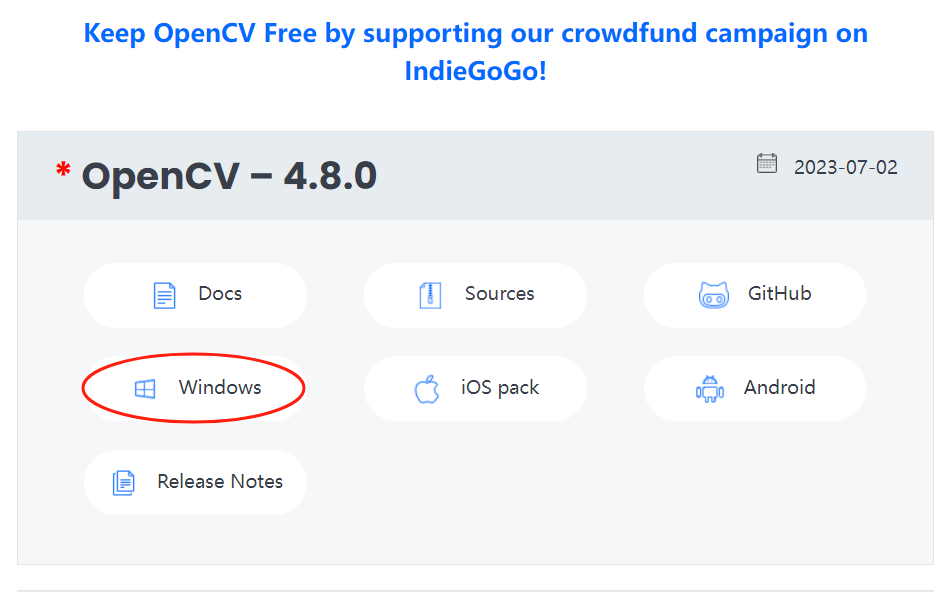

在 opencv.org 官网，下载windows版的安装包，实际上是一个7zip自解压文件，解压到指定的目录中。如`D:\Program Files\OpenCV\`  
CascadeClassifier，是Opencv中做人脸检测的时候的一个级联分类器  
cv2.cvtcolor函数是Python OpenCV中一个非常常用的函数，主要作用是将图像从一种颜色空间转换为另一种颜色空间，包括RGB、灰度、HSV等颜色空间，  
HSV颜色模型 每一种颜色都是由色相(Hue,简H),饱和度(Saturation,简S)和色明度(Value,简V)所表示的

In [2]:
# 该模型是OpenCV官方训练好的人脸正脸检测模型，
xml = r"D:\Program Files\OpenCV\sources\data\haarcascades\haarcascade_frontalface_default.xml"

##### lena人脸识别

In [3]:
import cv2

img=cv2.imread('img/opencv/lena.jpg')  	#读取图像

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_detector = cv2.CascadeClassifier(xml)
faces = face_detector.detectMultiScale(gray_img)

for x, y, w, h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0,255,0), thickness=5)

cv2.imshow("result", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

##### 多张人脸检测

In [4]:
import cv2

img=cv2.imread('img/opencv/manypeople.jpeg')  		#读取图像
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_detector = cv2.CascadeClassifier(xml)
faces = face_detector.detectMultiScale(gray_img)

for x, y, w, h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0,255,0), thickness=2)

cv2.imshow("result", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

## 视频中的人脸检测

In [ ]:
import cv2
video_face = cv2.VideoCapture(r"data/video_face.mp4")
while True:
    # read()方法返回视频中检测的对象，,视频在播放flag为True,frame为当前帧上的图片
    flag, frame = video_face.read()
    if not flag:
        break
    # 将图片进行灰度化
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 加载特征数据
    face_detector = cv2.CascadeClassifier(xml)
    faces = face_detector.detectMultiScale(gray)
    print(len(faces))
    for x, y, w, h in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), color=(0, 0, 255), thickness=2)
        cv2.circle(frame, center=(x + w // 2, y + h // 2), radius=(w // 2), color=(0, 255, 0), thickness=2)
    cv2.imshow("result", frame)
    cv2.waitKey(20)
cv2.destroyAllWindows()
video_face.release()

In [ ]:
cv2.destroyAllWindows() 

## 人脸识别

##### 人脸识别数据训练

In [10]:
def out_getImageAndLabels():
    import cv2
    import numpy as np
    def getImageAndLabels(path):
        """
        获取图片特征值和目标值
        :param path:
        :return:
        """
        # 导包
        import os
        import sys
        from PIL import Image
        """
        PIL(Python Image Library)是python的第三方图像处理库，
        但是由于其强大的功能与众多的使用人数，几乎已经被认为
        是python官方图像处理库了。Image模块是在Python PIL图像
        处理中常见的模块，对图像进行基础操作的功能基本都包含于此模块内。
        如open、save、conver、show…等功能
        """
        facesSamples = []
        ids = []
        imagePaths = [os.path.join(path, f) for f in os.listdir(path)]
        face_detector = cv2.CascadeClassifier(xml)
        # 遍历列表中的图片
        for imagePath in imagePaths:
            # 打开图片。convert()函数，用于不同模式图像之间的转换。
            # PIL中有九种不同模式，分别为1，L，P，RGB，RGBA，CMYK，YCbCr，I，F。主要尝试1和L。
            # 模式”1”为二值图像，非黑即白。但是它每个像素用8个bit表示，0表示黑，255表示白。
            # 模式“L” 为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度。
            PIL_img = Image.open(imagePath).convert("L")
            # 将图像转换我数组
            img_numpy = np.array(PIL_img, "uint8")
            faces = face_detector.detectMultiScale(img_numpy)
            # 获取每张图片的id
            id = int(os.path.split(imagePath)[1].split(".")[0])
            # id = os.path.split(imagePath)[1].split(".")[0]
            for x, y, w, h in faces:
                # 添加人脸区域图片
                facesSamples.append(img_numpy[y:y + h, x:x + w])
                ids.append(id)
        return facesSamples, ids

    # 图片路径
    path = "img/opencv/jm"
    # 获取图像数组和id数组标签
    faces, ids = getImageAndLabels(path)
    # 训练对象
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.train(faces, np.array(ids))
    # 保存训练文件
    recognizer.write("data/opencv/trainer.yml")

输出结果：

当前目录会生成trainer.yml文件

##### 人脸匹配

In [ ]:
def match_face():
    """
    人脸匹配
    """
    # 导包
    import cv2
    import numpy as np
    import os
    # 加载训练数据集文件
    recogizer = cv2.face.LBPHFaceRecognizer_create()
    recogizer.read("data/opencv/trainer.yml")
    # 准备识别的图片
    img = cv2.imread("img/opencv/lena.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier(xml)
    faces = face_detector.detectMultiScale(gray)
    for x, y, w, h in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # 人脸识别
        id, confidence = recogizer.predict(gray[y:y + h, x:x + w])
        print("标签id：", id, "置信度评分：", confidence)
    cv2.imshow("result", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()